# Lab Customer Analysis Round 2
For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

Dealing with the data
1. Show the dataframe shape.
2. Standardize header names.
3. Which columns are numerical?
4. Which columns are categorical?
5. Check and deal with NaN values.
6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
BONUS: Put all the previously mentioned data transformations into a function.

In [43]:
# import the necessary libraries
import pandas as pd
import numpy as np

#read the csv file into a pandas dataframe

customers = pd.read_csv('C:/Users/Ish/Documents/Ironhack Bootcamp/Day 4/lab-customer-analysis-round-4/files_for_lab/csv_files/marketing_customer_analysis.csv', index_col = [0])

# view the data frame
print(customers.head())

# view the shape of the dataframe
print(customers.shape)

               State  Customer Lifetime Value Response  Coverage Education  \
Customer                                                                     
BU79786   Washington              2763.519279       No     Basic  Bachelor   
QZ44356      Arizona              6979.535903       No  Extended  Bachelor   
AI49188       Nevada             12887.431650       No   Premium  Bachelor   
WW63253   California              7645.861827       No     Basic  Bachelor   
HB64268   Washington              2813.692575       No     Basic  Bachelor   

         Effective To Date EmploymentStatus Gender  Income Location Code  ...  \
Customer                                                                  ...   
BU79786            2/24/11         Employed      F   56274      Suburban  ...   
QZ44356            1/31/11       Unemployed      F       0      Suburban  ...   
AI49188            2/19/11         Employed      F   48767      Suburban  ...   
WW63253            1/20/11       Unemployed     

In [44]:
#view column header and standardize headers
cols= [col.lower() for col in customers.columns]
print(cols)
cols[6] = 'employment status'

#update column headers
customers.columns = cols
customers.head(3)


['state', 'customer lifetime value', 'response', 'coverage', 'education', 'effective to date', 'employmentstatus', 'gender', 'income', 'location code', 'marital status', 'monthly premium auto', 'months since last claim', 'months since policy inception', 'number of open complaints', 'number of policies', 'policy type', 'policy', 'renew offer type', 'sales channel', 'total claim amount', 'vehicle class', 'vehicle size']


,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [45]:
# determine which columns are numerical
print(customers.dtypes)

state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object


In [46]:
# print the columns containing numerical data

#print('Numerical Data\n',customers._get_numeric_data().T.head())

# print the columns containing categorical data
print('Categorical Data\n',customers.select_dtypes('object').T.head())

Categorical Data
 Customer              BU79786   QZ44356   AI49188     WW63253     HB64268  \
state              Washington   Arizona    Nevada  California  Washington   
response                   No        No        No          No          No   
coverage                Basic  Extended   Premium       Basic       Basic   
education            Bachelor  Bachelor  Bachelor    Bachelor    Bachelor   
effective to date     2/24/11   1/31/11   2/19/11     1/20/11      2/3/11   

Customer            OC83172  XZ87318  CF85061   DY87989   BQ94931  ...  \
state                Oregon   Oregon  Arizona    Oregon    Oregon  ...   
response                Yes      Yes       No       Yes        No  ...   
coverage              Basic    Basic  Premium     Basic  Extended  ...   
education          Bachelor  College   Master  Bachelor   College  ...   
effective to date   1/25/11  2/24/11  1/18/11   1/26/11   2/17/11  ...   

Customer              CB59349               RX91025     AC13887     TF5620

In [47]:
# check for NaN values in the dataset
# determine numbers of null values by column
print('Data before removing empty rows:\n',customers.shape)
na_percent_df = pd.DataFrame(round(customers.isna().sum()/len(customers),4)*100)
na_percent_df.columns = ['PercentNaNs']
print(na_percent_df)

Data before removing empty rows:
 (9134, 23)
                               PercentNaNs
state                                  0.0
customer lifetime value                0.0
response                               0.0
coverage                               0.0
education                              0.0
effective to date                      0.0
employment status                      0.0
gender                                 0.0
income                                 0.0
location code                          0.0
marital status                         0.0
monthly premium auto                   0.0
months since last claim                0.0
months since policy inception          0.0
number of open complaints              0.0
number of policies                     0.0
policy type                            0.0
policy                                 0.0
renew offer type                       0.0
sales channel                          0.0
total claim amount                     0.0
vehicle c

In [48]:
# the column 'vehicle type' is missing more than 50% of values. This column should therefore be dropped.
# customers = customers.drop(['vehicle type'], axis = 1)

In [49]:
# There are six volumns with an average of 5.76% null values.
# Rather than dropping this data it might be a better to replace the NaN values

# Replace null values for 'state'
most_common_state = customers['state'].mode()
most_common_state
customers['state'] = customers['state'].fillna(most_common_state[0])

# Replace null values for 'response'
most_common_response = customers['response'].mode()
customers['response'] = customers['response'].fillna(most_common_response[0])

#Replace null values for 'months since last claim'
most_common_mslc = customers['months since last claim'].mode()
customers['months since last claim'] = customers['months since last claim'].fillna(most_common_mslc[0])

#Replace null values for 'number of open complaints'
most_common_nooc = customers['number of open complaints'].mode()
customers['number of open complaints'] = customers['number of open complaints'].fillna(most_common_nooc[0])

# Replace null values for 'vehicle class'
most_common_v_class = customers['vehicle class'].mode()
customers['vehicle class'] = customers['vehicle class'].fillna(most_common_v_class[0])

# Replace null values for 'vehicle size'
most_common_v_size = customers['vehicle size'].mode()
customers['vehicle size'] = customers['vehicle size'].fillna(most_common_v_size[0])

na_percent_df = pd.DataFrame(round(customers.isna().sum()/len(customers),4)*100)
na_percent_df


,0
state,0.0
customer lifetime value,0.0
response,0.0
coverage,0.0
education,0.0
effective to date,0.0
employment status,0.0
gender,0.0
income,0.0
location code,0.0


In [50]:
# Date Time Format
# select months from the 'effective to date' column and store as a separate column

# convert date columne to date time format
customers['effective to date'] = pd.to_datetime(customers['effective to date'])
#customers['effective to date'].head(25)

# create a list of values from the datetime column
months = list()
for date in customers['effective to date']:
    months.append(date.month)

#create column of months using stored datetime month values
customers['month'] = months

#define function to convert numerical months to strings
def mon_stringer(m):
    months_s = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    m = months_s[m-1]
    return m

#convert 'month' values to strings
customers['month'] = customers['month'].apply(lambda x: mon_stringer(x))

# filter values by the first quarter.
customers_first_quarter = customers[customers['month'].isin(['January','February','March'])].sort_values(by = 'month', ascending=False)
print(customers_first_quarter.head())
print(customers_first_quarter.tail())

               state  customer lifetime value response  coverage  \
Customer                                                           
PY50779      Arizona              7060.212867       No  Extended   
EO75698       Oregon             22242.516590       No   Premium   
AG45299   California              8595.726399       No     Basic   
SM10254       Oregon              4726.869327      Yes  Extended   
YC69616      Arizona              2719.506996      Yes     Basic   

                     education effective to date employment status gender  \
Customer                                                                    
PY50779   High School or Below        2011-01-27          Employed      M   
EO75698               Bachelor        2011-01-09          Employed      F   
AG45299                College        2011-01-20          Employed      M   
SM10254               Bachelor        2011-01-10     Medical Leave      F   
YC69616                College        2011-01-24           Re

#Lab Customer Analysis Round 3

For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

Get the data

Use the same jupyter file from the last lab, Customer Analysis Round 3

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.

In [51]:
# Show Dataframe information with the df.describe()
# Dataframe transposed for readability.
print('Numeric Data:\n', customers.describe().T)
#print('Non Numeric Data:\n', customers.describe(include = [np.object]).T)

Numeric Data:
                                 count          mean           std  \
customer lifetime value        9134.0   8004.940475   6870.967608   
income                         9134.0  37657.380009  30379.904734   
monthly premium auto           9134.0     93.219291     34.407967   
months since last claim        9134.0     15.097000     10.073257   
months since policy inception  9134.0     48.064594     27.905991   
number of open complaints      9134.0      0.384388      0.910384   
number of policies             9134.0      2.966170      2.390182   
total claim amount             9134.0    434.088794    290.500092   

                                       min          25%           50%  \
customer lifetime value        1898.007675  3994.251794   5780.182197   
income                            0.000000     0.000000  33889.500000   
monthly premium auto             61.000000    68.000000     83.000000   
months since last claim           0.000000     6.000000     14.000000  

In [52]:
#import necessary libraries for visualizations
import matplotlib as plt
import seaborn as sns
%matplotlib inline 

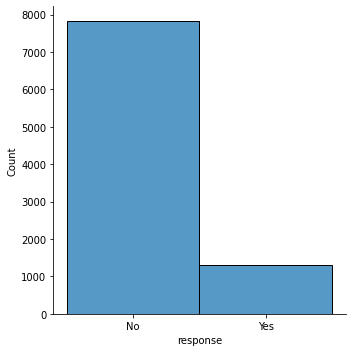

In [53]:
# plot total number of responses
dist_response = sns.displot(customers['response'])
dist_response


In [54]:
# define a function to return a numerical value of the rate of the responses.
"""def rate(df):
    Yes = []
    No = []
    for x in df['response']:
        if x == "Yes":
            Yes.append(x)
        else:
            No.append(x)
    yes_rates = len(Yes)/len(df['response'])
    no_rates =  len(No)/len(df['response'])
    return yes_rates, no_rates
"""
# create a function that converts Yes and No values to 1 or 0 values

def response_rate(x):
    if x == 'No':
        return 0
    else:
        return 1



In [55]:
# create a new column for the response rate
# response rate will be the numeric values corresponding to Yes or No from 0 to 1.
customers['response rate'] = customers['response'].apply(lambda x: response_rate(x))

customers['response rate'].value_counts()
#customers['response rate'].tail(25)


0    7826
1    1308
Name: response rate, dtype: int64

<AxesSubplot:xlabel='sales channel', ylabel='response rate'>

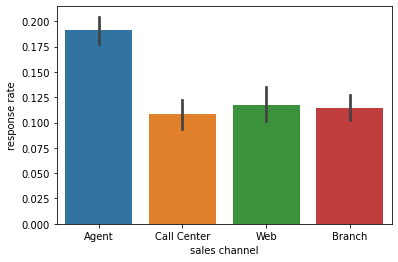

In [56]:
#plot of the response rate by the sales channel.
sns.barplot(y = 'response rate', x = 'sales channel', data = customers,)

<AxesSubplot:xlabel='response rate', ylabel='total claim amount'>

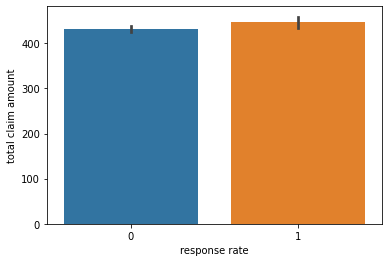

In [57]:
# plot the response rate by the total claim amount.
response_by_total_claim = sns.barplot(x = 'response rate', y = 'total claim amount', data = customers)
response_by_total_claim

<AxesSubplot:xlabel='response rate', ylabel='income'>

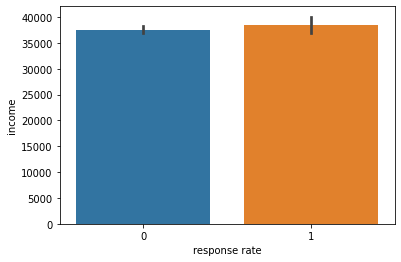

In [58]:
#plot the response rate by income.
response_rate_by_income = sns.barplot(x = 'response rate', y = 'income', data = customers)
response_rate_by_income




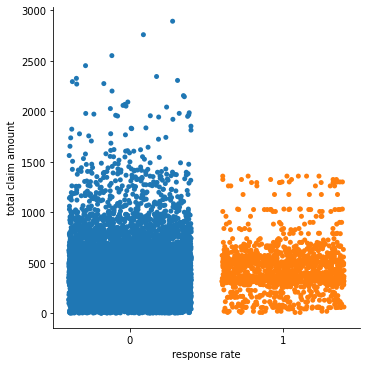

In [59]:
#plot the response rate by income. (Thanks Ines!)
response_rate_by_total_claim2 = sns.catplot(x="response rate",y="total claim amount", data=customers,jitter="0.4")
response_rate_by_total_claim2

# Lab | Customer Analysis Round 4
In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the marketing_customer_analysis.csv file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the files_for_lab folder.

1. Get the data
Use the jupyter file from the last lab (Customer Analysis Round 3)

## Complete the following tasks
1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
2. Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
3. Do the distributions for different numerical variables look like a normal distribution
For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [60]:
# Check column data types once more.
print(customers.dtypes)

state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment status                        object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                   int64
months since policy inception             int64
number of open complaints                 int64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                            object
total claim amount                      

In [77]:
# assign numerical data to new dataframe
numericals = customers._get_numeric_data()
print(numericals.dtypes)

# assign categorical data to new dataframe
categoricals = customers.select_dtypes('object')
print(categoricals.dtypes)

customer lifetime value          float64
income                             int64
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
total claim amount               float64
response rate                      int64
dtype: object
state                object
response             object
coverage             object
education            object
employment status    object
gender               object
location code        object
marital status       object
policy type          object
policy               object
renew offer type     object
sales channel        object
vehicle class        object
vehicle size         object
month                object
dtype: object


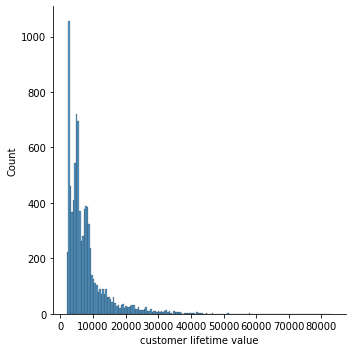

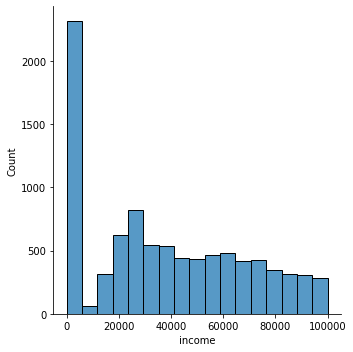

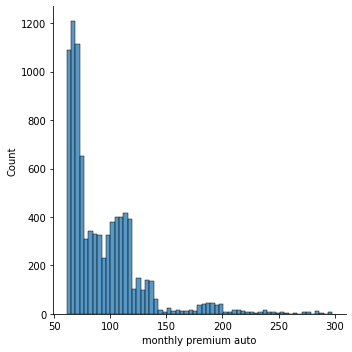

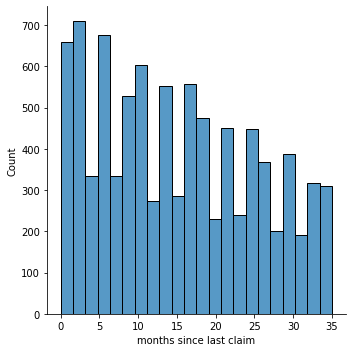

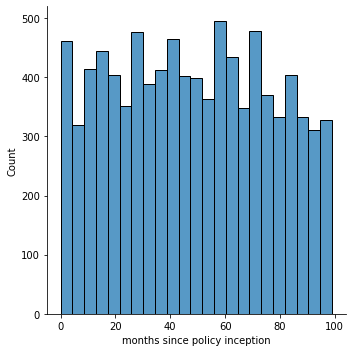

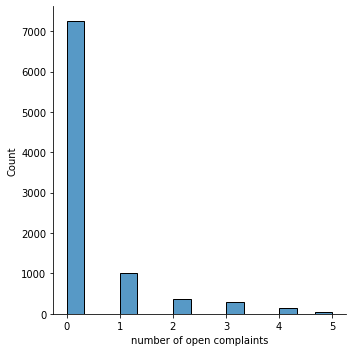

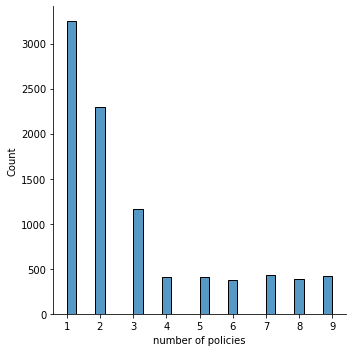

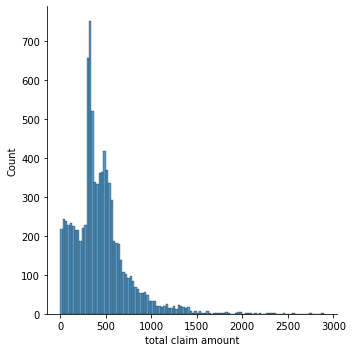

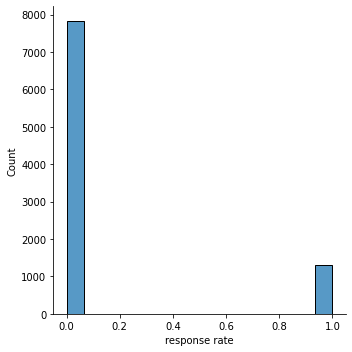

In [79]:
#check the distribution of the numerical variables using seaborn library to construct distribution plots.
for c in numericals:
     sns.displot(numericals[c])
    

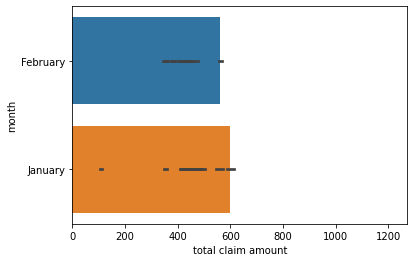

In [81]:
# Create bar plots for the categorical variables.
for c in categoricals:
    sns.barplot(x = numericals['total claim amount'], y = categoricals[c])

<AxesSubplot:>

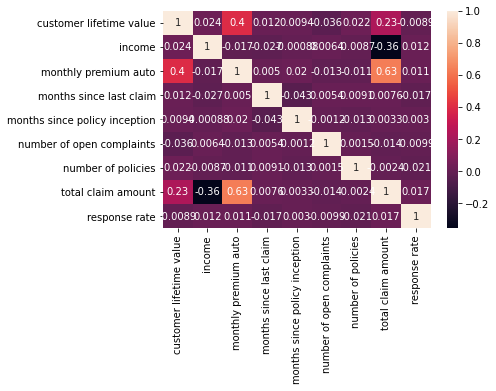

In [64]:
# Check for the collinearity between features in customers_num
correlation_matrix = customers_num.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True)
heatmap

In [65]:
# There do not appear to be any strongly correlated features.